# Make 30-fold ROC Figure (Supplement)

Gaylen Fronk & John Curtin  
June 4, 2024

## Set Up Environment

In [ ]:
version <- "v6"
cv <- "nested"

Function conflicts

In [ ]:
#| message: false
#| warning: false

# source
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_ml.R?raw=true")

ℹ SHA-1 hash of file is "77e91675366f10788c6bcb59fa1cfc9ee0c75281"

Packages for script

In [ ]:
#| message: false
#| warning: false

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──
✔ broom        1.0.5      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

Source support functions

In [ ]:
# EDA
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_eda.R?raw=true")

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

ℹ SHA-1 hash of file is "75cc6f7b855da59c240908bd936834b4da01285b"

Absolute paths

In [ ]:
switch (Sys.info()[['sysname']],
        # PC paths
        Windows = {
          path_models <- str_c("P:/studydata/match/models/")},
        
        # IOS paths
        Darwin = {
          path_models <- str_c("/Volumes/private/studydata/match/models/")},
        
        # Linux paths
        Linux = {
          path_models <- str_c("~/mnt/private/studydata/match/models/")}
)

Chunk Defaults

In [ ]:
#| include: false

knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')

options(tibble.width = Inf)
options(tibble.print_max = Inf)

Source training controls

In [ ]:
# EDA
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_eda.R?raw=true")

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

ℹ SHA-1 hash of file is "77e91675366f10788c6bcb59fa1cfc9ee0c75281"

## Read in model performance metrics

In [ ]:
preds4 <- read_rds(file.path(path_models, "pp_hybrid_wk4_outcome",
                             str_c("outer_preds_", version, 
                                   "_", cv, ".rds"))) |> 
  glimpse()

Rows: 3,258
Columns: 3
$ outer_split_num <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ prob_raw        <dbl> 0.1909314, 0.4794358, 0.3849448, 0.2902418, 0.3972917,…
$ label           <fct> smoking, smoking, smoking, smoking, abstinent, abstine…

Rows: 3,258
Columns: 3
$ outer_split_num <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ prob_raw        <dbl> 0.1862854, 0.3980996, 0.3649690, 0.1939145, 0.3186398,…
$ label           <fct> smoking, smoking, smoking, smoking, abstinent, abstine…

Rows: 3,258
Columns: 3
$ outer_split_num <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ prob_raw        <dbl> 0.10822448, 0.36604609, 0.21339801, 0.11732050, 0.2180…
$ label           <fct> smoking, smoking, smoking, smoking, smoking, abstinent…

## ROC curves

### 4-week model

Set up

In [ ]:
roc_data4 <- preds4 %>%
  roc_curve(prob_raw, truth = label)

# rocs per fold
roc_folds4 <- preds4 %>%
  nest(.by = outer_split_num, .key = "preds") |> 
  mutate(roc = map(preds, \(preds) roc_curve(preds, prob_raw, 
                                             truth = label)))

fig_roc_folds4 <- roc_data4 %>%  # plot region from full concatenated data 
  ggplot(aes(x = 1 - specificity, y = sensitivity)) + 
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25),
                     labels = sprintf("%.2f", seq(1,0,-.25))) +
  theme(axis.text = element_text(size = rel(0.75)),
        axis.title = element_text(size = rel(1)))

for (i in 1:nrow(roc_folds4)) {
  fig_roc_folds4 <- fig_roc_folds4 +
    geom_path(data = roc_folds4$roc[[i]],
              mapping = aes(x = 1 - specificity, y = sensitivity),
              color = "gray")
}

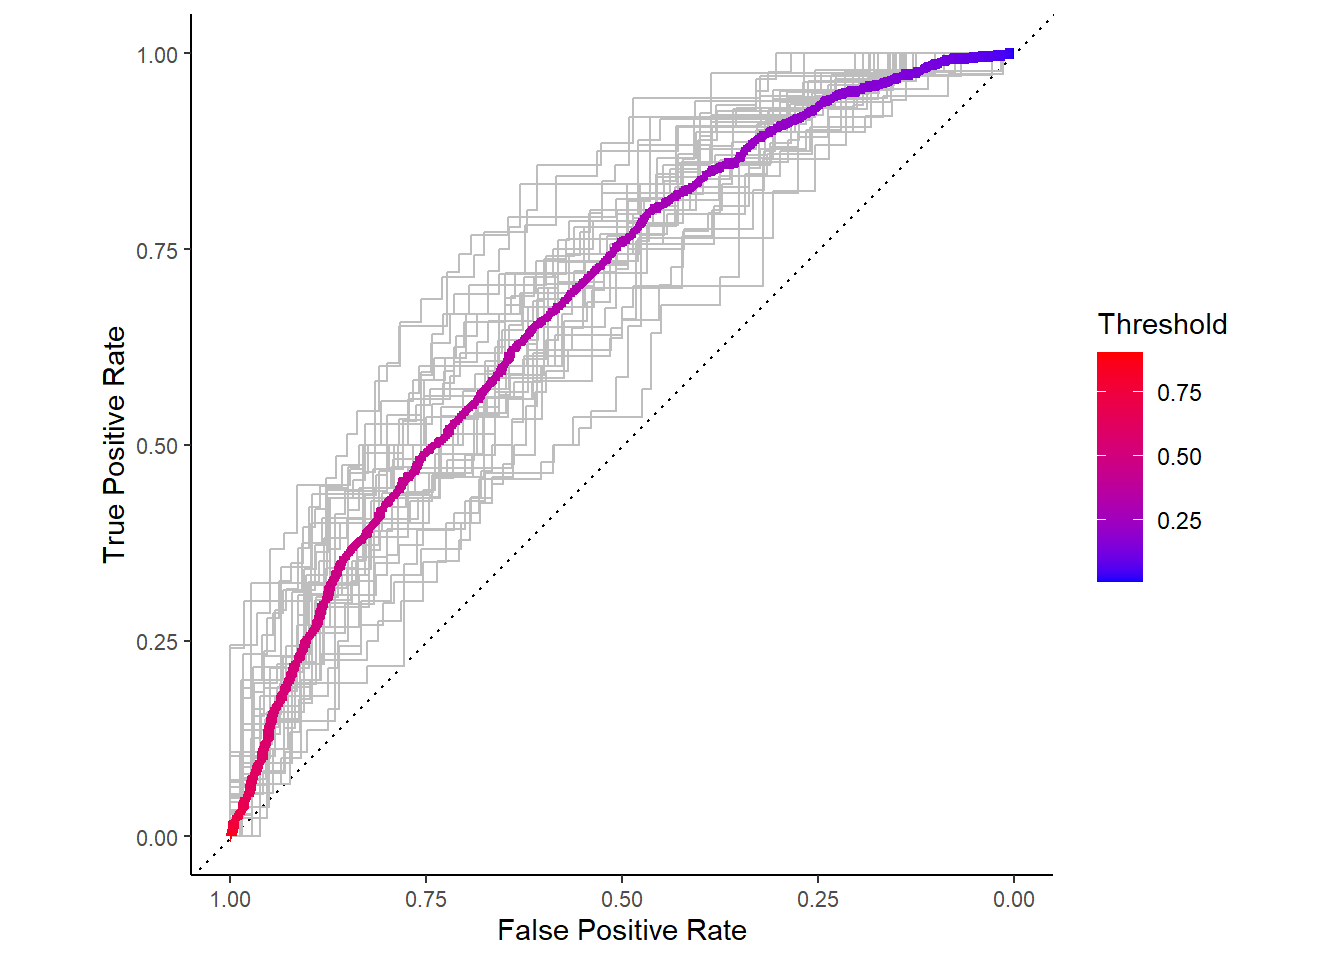

In [ ]:
#| label: fig-roc-wk4

#add full concatenated curve
fig_roc_all_wk4 <- fig_roc_folds4 +
  geom_path(data = roc_data4,
            mapping = aes(x = 1 - specificity, y = sensitivity, color = .threshold),
            linewidth = 2) +
  scale_color_gradient(low="blue", high="red") +
  labs(color = "Threshold",
       x = "False Positive Rate")

fig_roc_all_wk4

### 12-week model

Set up

In [ ]:
roc_data12 <- preds12 %>%
  roc_curve(prob_raw, truth = label)

# rocs per fold
roc_folds12 <- preds12 %>%
  nest(.by = outer_split_num, .key = "preds") |> 
  mutate(roc = map(preds, \(preds) roc_curve(preds, prob_raw, 
                                             truth = label)))

fig_roc_folds12 <- roc_data12 %>%  # plot region from full concatenated data 
  ggplot(aes(x = 1 - specificity, y = sensitivity)) + 
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25),
                     labels = sprintf("%.2f", seq(1,0,-.25))) +
  theme(axis.text = element_text(size = rel(0.75)),
        axis.title = element_text(size = rel(1)))

for (i in 1:nrow(roc_folds12)) {
  fig_roc_folds12 <- fig_roc_folds12 +
    geom_path(data = roc_folds12$roc[[i]],
              mapping = aes(x = 1 - specificity, y = sensitivity),
              color = "gray")
}

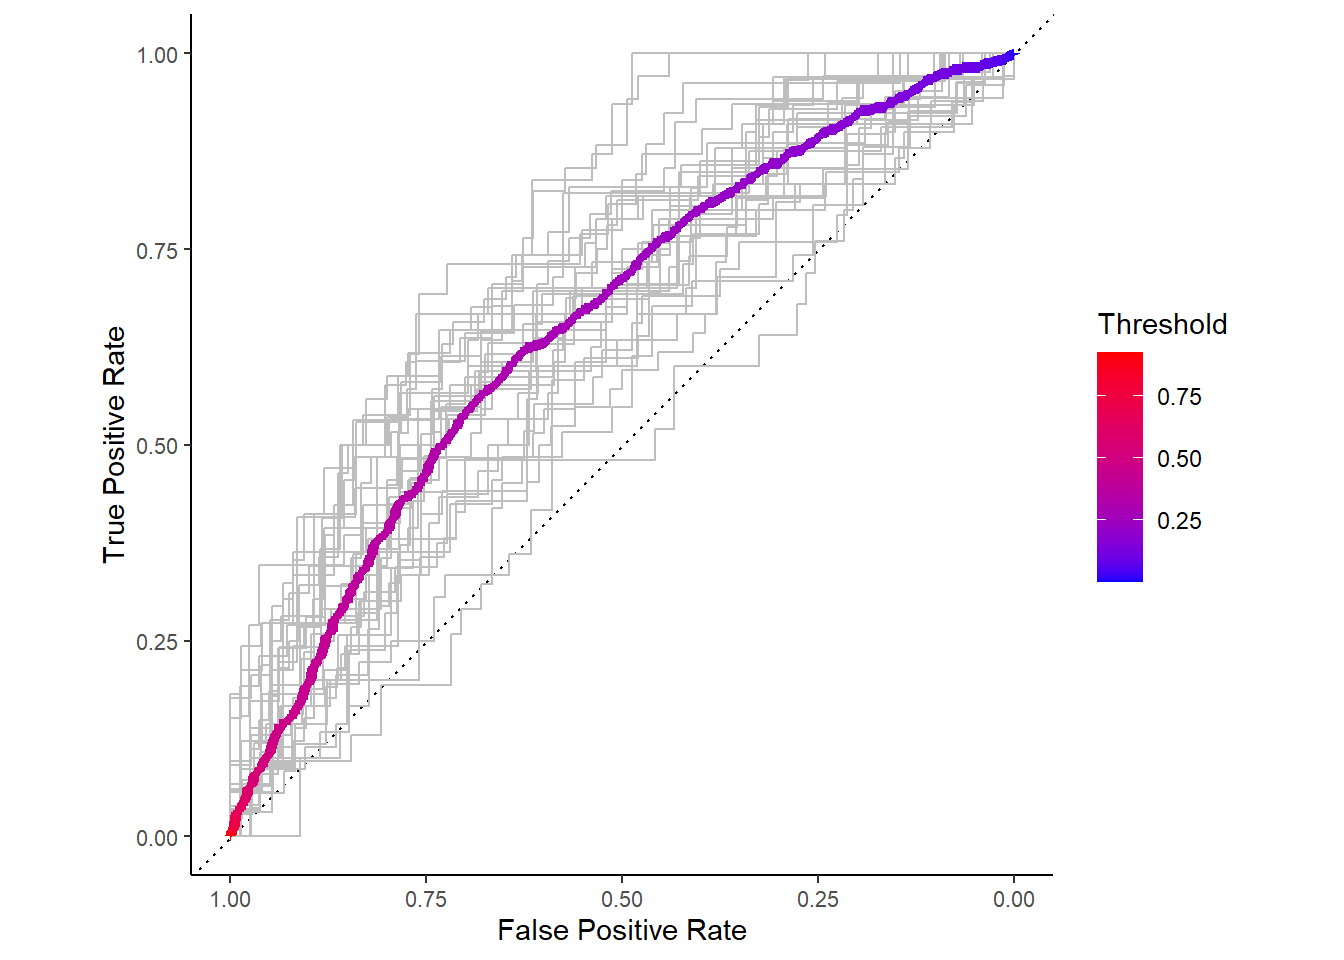

In [ ]:
#| label: fig-roc-wk12

#add full concatenated curve
fig_roc_all_wk12 <- fig_roc_folds12 +
  geom_path(data = roc_data12,
            mapping = aes(x = 1 - specificity, y = sensitivity, color = .threshold),
            linewidth = 2) +
  scale_color_gradient(low="blue", high="red") +
  labs(color = "Threshold",
       x = "False Positive Rate")

fig_roc_all_wk12

### 26-week model

Set up

In [ ]:
roc_data26 <- preds26 %>%
  roc_curve(prob_raw, truth = label)

# rocs per fold
roc_folds26 <- preds26 %>%
  nest(.by = outer_split_num, .key = "preds") |> 
  mutate(roc = map(preds, \(preds) roc_curve(preds, prob_raw, 
                                             truth = label)))

fig_roc_folds26 <- roc_data26 %>%  # plot region from full concatenated data 
  ggplot(aes(x = 1 - specificity, y = sensitivity)) + 
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25),
                     labels = sprintf("%.2f", seq(1,0,-.25))) +
  theme(axis.text = element_text(size = rel(0.75)),
        axis.title = element_text(size = rel(1)))

for (i in 1:nrow(roc_folds26)) {
  fig_roc_folds26 <- fig_roc_folds26 +
    geom_path(data = roc_folds26$roc[[i]],
              mapping = aes(x = 1 - specificity, y = sensitivity),
              color = "gray")
}

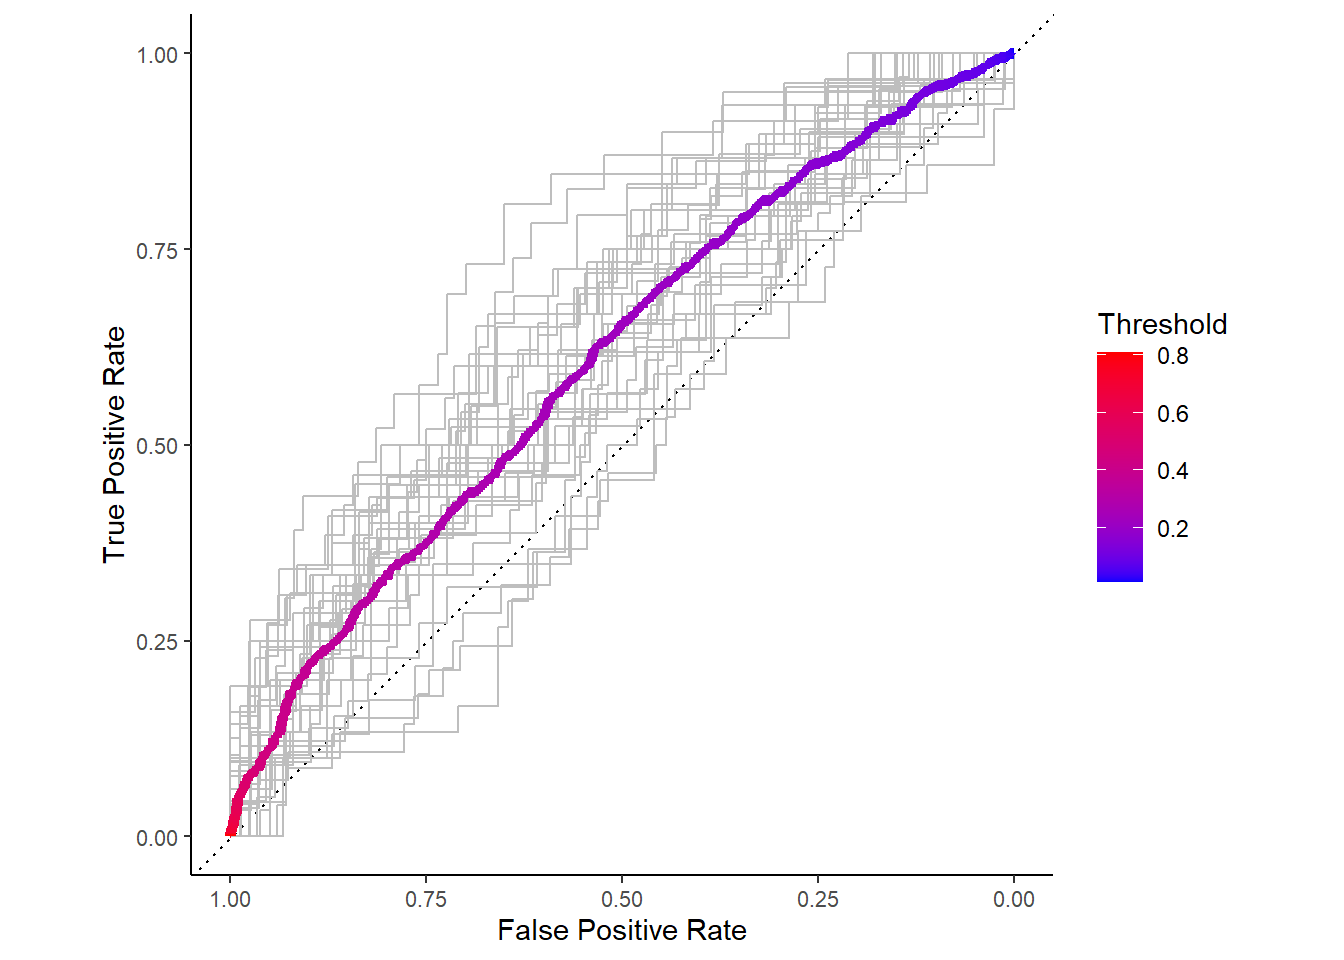

In [ ]:
#| label: fig-roc-wk26

#add full concatenated curve
fig_roc_all_wk26 <- fig_roc_folds26 +
  geom_path(data = roc_data26,
            mapping = aes(x = 1 - specificity, y = sensitivity, color = .threshold),
            linewidth = 2) +
  scale_color_gradient(low="blue", high="red") +
  labs(color = "Threshold",
       x = "False Positive Rate")

fig_roc_all_wk26

## Make paneled figure

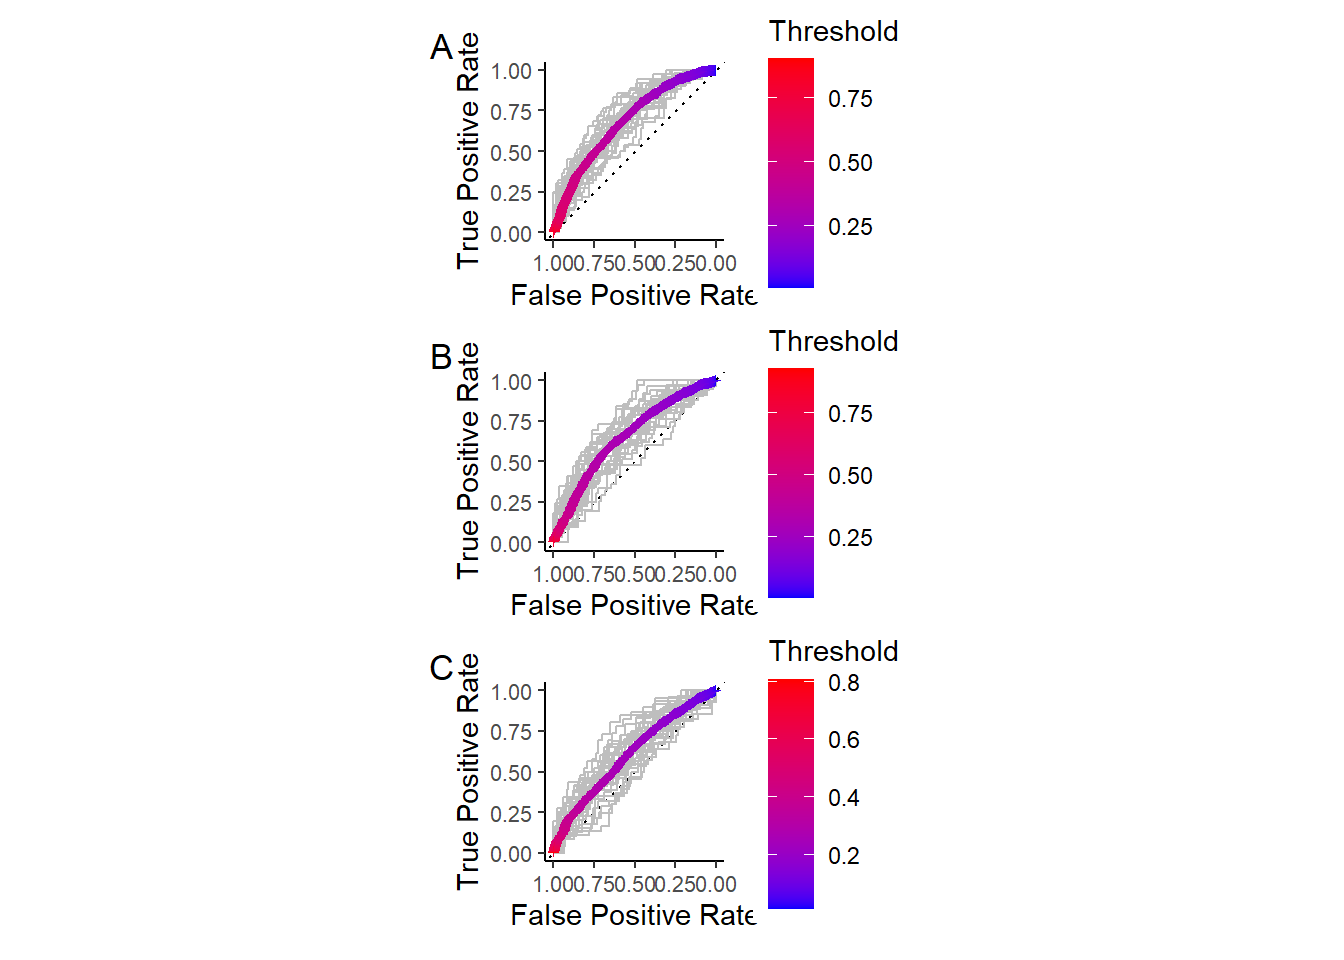

In [ ]:
#| label: fig-roc-all
#| fig-cap: "ROC Curves. Dotted, diagonal line represents chance performance (0.5). Grey lines display individual ROC curves from each of 30 held-out folds. Thick, colored line displays ROC curve concatenated across all 30 held-out folds. ROC curves are plotted over all possible decision thresholds. A) 4-week model. B) 12-week model. C) 26-week model."

fig_roc_all <- fig_roc_all_wk4 + fig_roc_all_wk12 + fig_roc_all_wk26 + 
  plot_layout(ncol = 1,
              guides = "keep") +
  plot_annotation(tag_levels = "A")

fig_roc_all